In [1]:
import pandas as pd

In [2]:
!pwd

/Users/antoniobravomunoz/Documents/GitHub/Data-Science-Master-project


In [3]:
#data0518=pd.read_csv('Data/Histórico de datos del tráfico desde 2013/05-2018.zip',sep=';')
source='/Users/antoniobravomunoz/Documents/DATA_SCIENCE_MASTER/TFM/Data/Historico/05-2018.zip'
data0518=pd.read_csv(source,sep=';')
#Por si hay que leer elos archivos largos por partes
#chunksize = 10 ** 8
#for chunk in pd.read_csv(filename, chunksize=chunksize):
#    process(chunk)

In [4]:
data0518.head()

,id,fecha,tipo_elem,intensidad,ocupacion,carga,vmed,error,periodo_integracion
0,1001,2018-05-01 00:00:00,M30,876,2,0,70,N,5
1,1002,2018-05-01 00:00:00,M30,816,3,0,74,N,5
2,1003,2018-05-01 00:00:00,M30,972,3,0,77,N,5
3,1006,2018-05-01 00:00:00,M30,852,2,0,69,N,5
4,1009,2018-05-01 00:00:00,M30,780,2,0,67,N,5


In [5]:
data0518.dtypes

id                      int64
fecha                  object
tipo_elem              object
intensidad              int64
ocupacion               int64
carga                   int64
vmed                    int64
error                  object
periodo_integracion     int64
dtype: object

In [6]:
type(data0518['tipo_elem'][1])

str

In [7]:
type(data0518['fecha'][1])

str

Hay que poner al columna de fecha como tipo fecha y no como string

In [8]:
data0518['fecha']=pd.to_datetime(data0518['fecha'], format='%Y-%m-%d %H:%M:%S')

In [9]:
data0518.dtypes

id                              int64
fecha                  datetime64[ns]
tipo_elem                      object
intensidad                      int64
ocupacion                       int64
carga                           int64
vmed                            int64
error                          object
periodo_integracion             int64
dtype: object

In [10]:
data0518.sample(10)

,id,fecha,tipo_elem,intensidad,ocupacion,carga,vmed,error,periodo_integracion
3287566,10110,2018-05-09 20:45:00,URB,844,3,26,0,N,15
11037810,6509,2018-05-30 16:15:00,URB,731,14,44,0,N,15
4341187,6248,2018-05-12 16:15:00,URB,54,1,10,0,N,13
10952869,3787,2018-05-30 11:00:00,URB,212,55,62,0,N,15
10986014,5637,2018-05-30 13:00:00,URB,757,7,27,0,N,15
11436241,4960,2018-05-31 19:45:00,URB,18,13,14,0,N,15
3365800,10105,2018-05-10 01:45:00,URB,13,5,5,0,N,15
7549672,5880,2018-05-21 07:00:00,URB,58,2,5,0,N,15
5016030,6716,2018-05-14 11:45:00,M30,468,5,36,71,N,15
8590442,6738,2018-05-24 02:00:00,M30,444,0,10,86,N,15


In [11]:
data0518.columns

Index(['id', 'fecha', 'tipo_elem', 'intensidad', 'ocupacion', 'carga', 'vmed',
       'error', 'periodo_integracion'],
      dtype='object')

In [12]:
data0518.count()
#Cuenta los datos que no son Nan

id                     11501592
fecha                  11501592
tipo_elem              11501592
intensidad             11501592
ocupacion              11501592
carga                  11501592
vmed                   11501592
error                  11501592
periodo_integracion    11501592
dtype: int64

In [13]:
data0518.shape

(11501592, 9)

Parece que no hay ningún Nan en los datos de este fichero

In [14]:
data0518.sample(10)

,id,fecha,tipo_elem,intensidad,ocupacion,carga,vmed,error,periodo_integracion
9197312,6310,2018-05-25 17:00:00,URB,607,10,34,0,N,15
5288353,4375,2018-05-15 05:15:00,URB,6,0,3,0,N,15
2082530,3551,2018-05-06 15:15:00,URB,76,22,26,0,N,15
699278,6211,2018-05-02 21:30:00,URB,102,3,17,0,N,15
733585,6057,2018-05-02 23:45:00,URB,30,1,8,0,N,10
6083172,5460,2018-05-17 08:30:00,URB,2310,8,46,0,N,15
5140336,4967,2018-05-14 19:45:00,URB,378,2,14,0,N,15
5678617,6508,2018-05-16 06:30:00,URB,378,2,21,0,N,15
11292952,9956,2018-05-31 10:30:00,URB,147,1,16,0,N,15
11019666,3849,2018-05-30 15:15:00,URB,580,6,42,0,N,15


Una vez hecho esto, vemos el tratamiento de las variables categóricas. En este caso: *tipo_elemento* y *error*

In [15]:
# tabla de frecuencia de de las medidas tomadas en la M30 o en calles 
pd.value_counts(data0518['tipo_elem'])

URB    10293912
M30     1207680
Name: tipo_elem, dtype: int64

Según la leyenda, puede haber 3 tipos de errores: 
- N: no ha habido errores ni sustituciones
- E: los parámetros de calidad de alguna de las muestras integradas no son óptimos.
- S: alguna de las muestras recibidas era totalmente errónea y no se ha integrado.

In [16]:
# nº de medidas categorizadas como erróneas
print(data0518.shape[0]-pd.value_counts(data0518['error']))

N    0
Name: error, dtype: int64


En este caso, y para este fichero, no hay medidas categorizadas como erróneas

### Visualización

In [35]:
from string import ascii_letters
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
# Compute the correlation matrix
corr = data0518.corr()

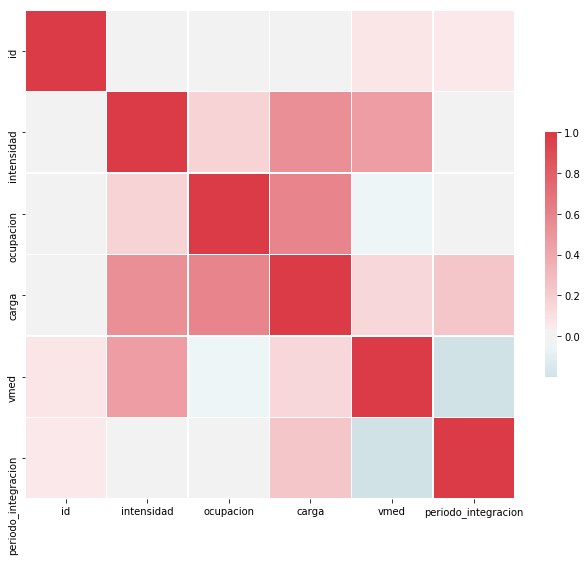

In [19]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
ax=sns.heatmap(corr, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Cogemos una muestra del dataset de 10000 features para poder obtener más resolución en la visualización

In [20]:
data0518_2=data0518.sample(10000)

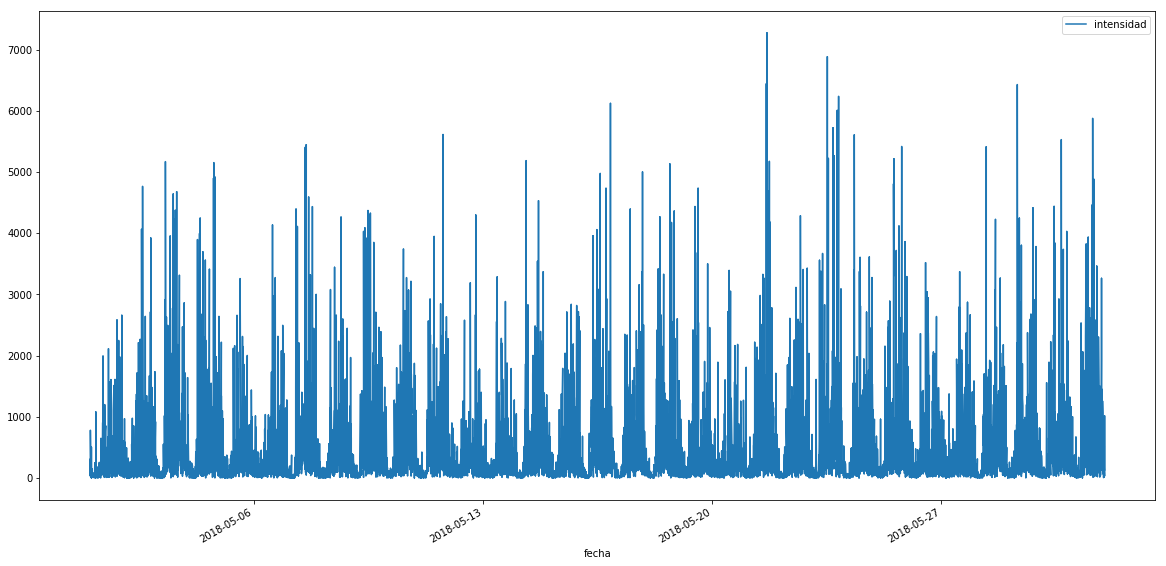

In [21]:
data0518_2.plot(x='fecha',y='intensidad',figsize=(20,10))

Dividimos la variable timestamp en fecha y hora y creamos dos nuevas variables

In [22]:
data0518['Fecha']=data0518["fecha"].dt.date
data0518['Hora']=data0518["fecha"].dt.time
data0518["Date"]=data0518["fecha"]

In [23]:
data0518.sample(10)

,id,fecha,tipo_elem,intensidad,ocupacion,carga,vmed,error,periodo_integracion,Fecha,Hora,Date
9386009,7083,2018-05-26 05:00:00,URB,0,0,0,0,N,15,2018-05-26,05:00:00,2018-05-26 05:00:00
3637030,5436,2018-05-10 19:15:00,URB,252,9,28,0,N,15,2018-05-10,19:15:00,2018-05-10 19:15:00
2638361,4740,2018-05-08 02:45:00,URB,21,1,1,0,N,15,2018-05-08,02:45:00,2018-05-08 02:45:00
2128034,6097,2018-05-06 18:00:00,URB,602,10,26,0,N,15,2018-05-06,18:00:00,2018-05-06 18:00:00
2711758,5415,2018-05-08 07:30:00,URB,543,4,22,0,N,15,2018-05-08,07:30:00,2018-05-08 07:30:00
6043208,4295,2018-05-17 06:00:00,URB,40,1,9,0,N,15,2018-05-17,06:00:00,2018-05-17 06:00:00
10334021,6039,2018-05-28 18:45:00,URB,1506,34,63,0,N,15,2018-05-28,18:45:00,2018-05-28 18:45:00
1821397,6882,2018-05-05 22:15:00,M30,276,2,0,54,N,5,2018-05-05,22:15:00,2018-05-05 22:15:00
3846309,4693,2018-05-11 08:45:00,URB,772,8,30,0,N,15,2018-05-11,08:45:00,2018-05-11 08:45:00
6943305,5064,2018-05-19 16:00:00,URB,374,2,16,0,N,15,2018-05-19,16:00:00,2018-05-19 16:00:00


In [24]:
data0518 = data0518.drop('fecha', 1)
#donde 1 es el número de eje ( 0 para filas y 1 para columnas). 

In [25]:
data0518.sample(10)

,id,tipo_elem,intensidad,ocupacion,carga,vmed,error,periodo_integracion,Fecha,Hora,Date
4869941,7077,URB,40,1,2,0,N,6,2018-05-14,02:15:00,2018-05-14 02:15:00
6002686,5830,URB,29,0,3,0,N,15,2018-05-17,03:15:00,2018-05-17 03:15:00
8573556,5338,URB,36,1,4,0,N,15,2018-05-24,01:00:00,2018-05-24 01:00:00
9061611,3644,URB,775,10,45,0,N,15,2018-05-25,08:30:00,2018-05-25 08:30:00
5324825,6545,URB,19,6,7,0,N,15,2018-05-15,07:30:00,2018-05-15 07:30:00
8418498,9963,URB,527,6,17,0,N,15,2018-05-23,15:00:00,2018-05-23 15:00:00
9907611,5543,URB,621,3,22,0,N,15,2018-05-27,15:00:00,2018-05-27 15:00:00
8992100,3494,M30,56,0,1,33,N,15,2018-05-25,04:00:00,2018-05-25 04:00:00
10958592,5711,URB,2193,16,50,0,N,15,2018-05-30,11:15:00,2018-05-30 11:15:00
9169710,6104,URB,206,42,42,0,N,15,2018-05-25,15:15:00,2018-05-25 15:15:00


In [26]:
data0518.dtypes

id                              int64
tipo_elem                      object
intensidad                      int64
ocupacion                       int64
carga                           int64
vmed                            int64
error                          object
periodo_integracion             int64
Fecha                          object
Hora                           object
Date                   datetime64[ns]
dtype: object

Filtrado por sensor

In [27]:
data0518.loc[data0518['id'] == 6806]

,id,tipo_elem,intensidad,ocupacion,carga,vmed,error,periodo_integracion,Fecha,Hora,Date
3174,6806,M30,152,2,9,58,N,15,2018-05-01,00:00:00,2018-05-01 00:00:00
7035,6806,M30,136,2,10,65,N,15,2018-05-01,00:15:00,2018-05-01 00:15:00
10911,6806,M30,133,2,9,62,N,15,2018-05-01,00:30:00,2018-05-01 00:30:00
14784,6806,M30,91,1,7,56,N,15,2018-05-01,00:45:00,2018-05-01 00:45:00
18661,6806,M30,80,2,6,54,N,15,2018-05-01,01:00:00,2018-05-01 01:00:00
22529,6806,M30,84,2,5,61,N,15,2018-05-01,01:15:00,2018-05-01 01:15:00
26403,6806,M30,88,1,6,54,N,15,2018-05-01,01:30:00,2018-05-01 01:30:00
30278,6806,M30,95,1,7,63,N,15,2018-05-01,01:45:00,2018-05-01 01:45:00
34149,6806,M30,56,1,4,52,N,15,2018-05-01,02:00:00,2018-05-01 02:00:00
38011,6806,M30,56,0,5,51,N,14,2018-05-01,02:15:00,2018-05-01 02:15:00


In [28]:
data0518.loc[data0518['id'] == 6806].describe()

,id,intensidad,ocupacion,carga,vmed,periodo_integracion
count,2975.0,2975.000000,2975.000000,2975.000000,2975.000000,2975.000000
mean,6806.0,545.072269,10.313613,35.747899,59.125042,14.891765
std,0.0,451.002080,12.704843,28.300594,20.462174,0.592247
min,6806.0,0.000000,0.000000,0.000000,-1.000000,8.000000
25%,6806.0,108.000000,2.000000,7.000000,52.000000,15.000000
50%,6806.0,520.000000,8.000000,35.000000,69.000000,15.000000
75%,6806.0,851.000000,13.500000,56.000000,72.000000,15.000000
max,6806.0,1764.000000,86.000000,100.000000,84.000000,15.000000


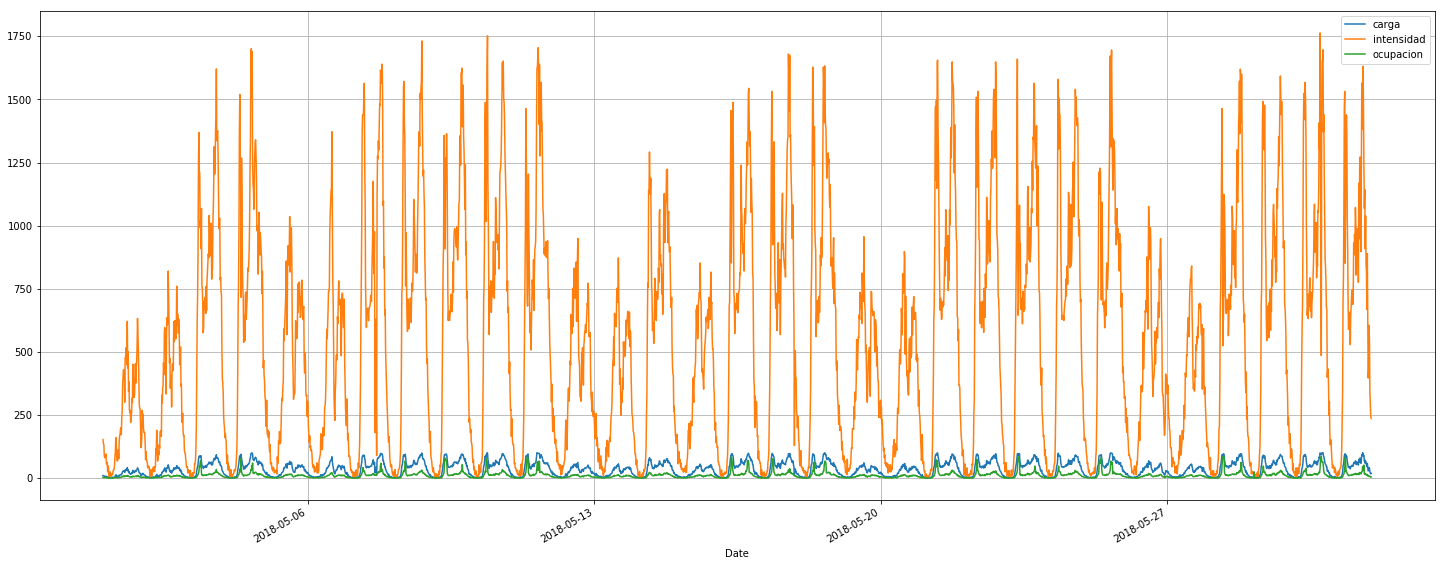

In [29]:
#data0518.filter(like='7035', axis=0)

#EN ESTE CASO SE OBSERVA LA VARIACIÓN DE LA INTENSIDAD DE TRÁFICO CON EL TIEMPO DURANTE TODO EL MES
data0518.loc[data0518['id'] == 6806].plot(x='Date',y=['carga','intensidad','ocupacion'],figsize=(25,10),grid=True)

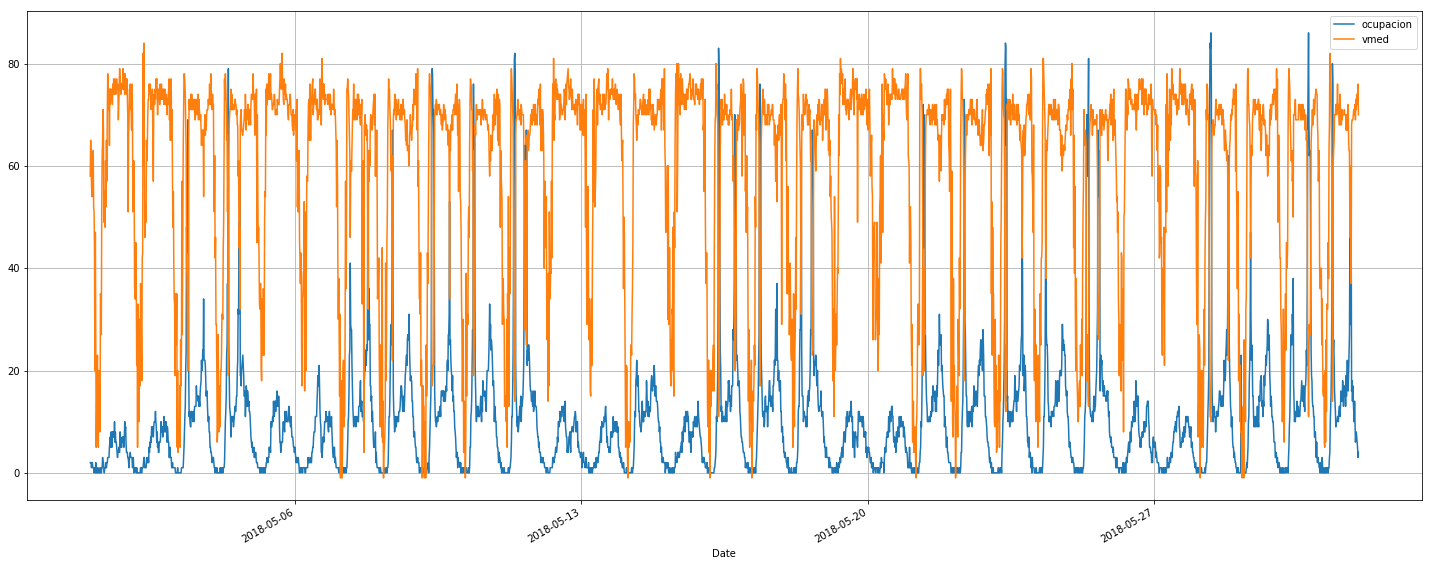

In [30]:
data0518.loc[data0518['id'] == 6806].plot(x='Date',y=['ocupacion','vmed'],figsize=(25,10),grid=True)

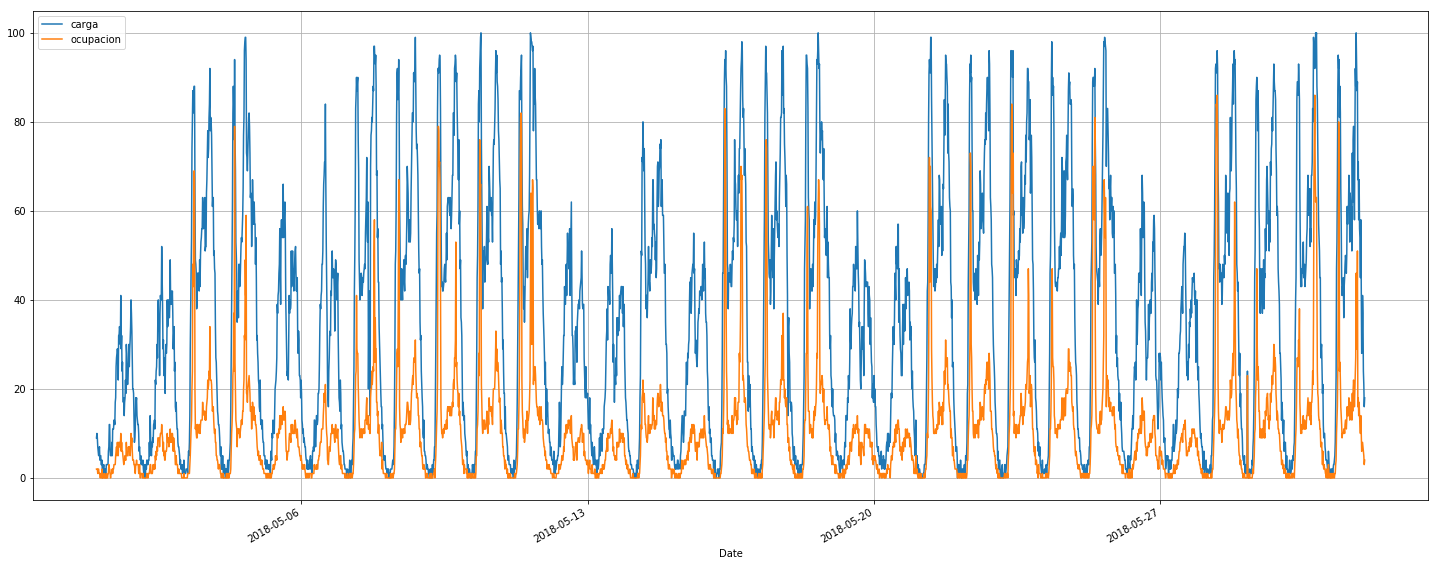

In [31]:
data0518.loc[data0518['id'] == 6806].plot(x='Date',y=['carga','ocupacion'],figsize=(25,10),grid=True)

In [32]:
df_id6806=data0518.loc[data0518['id'] == 6806].reset_index()
df_id6806.head()

,index,id,tipo_elem,intensidad,ocupacion,carga,vmed,error,periodo_integracion,Fecha,Hora,Date
0,3174,6806,M30,152,2,9,58,N,15,2018-05-01,00:00:00,2018-05-01 00:00:00
1,7035,6806,M30,136,2,10,65,N,15,2018-05-01,00:15:00,2018-05-01 00:15:00
2,10911,6806,M30,133,2,9,62,N,15,2018-05-01,00:30:00,2018-05-01 00:30:00
3,14784,6806,M30,91,1,7,56,N,15,2018-05-01,00:45:00,2018-05-01 00:45:00
4,18661,6806,M30,80,2,6,54,N,15,2018-05-01,01:00:00,2018-05-01 01:00:00


/Users/antoniobravomunoz/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


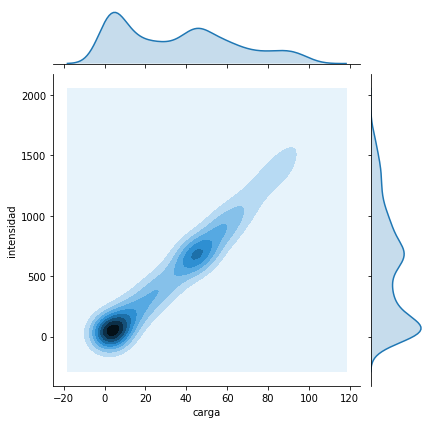

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
sns.jointplot(df_id6806['carga'], df_id6806['intensidad'], kind='kde')

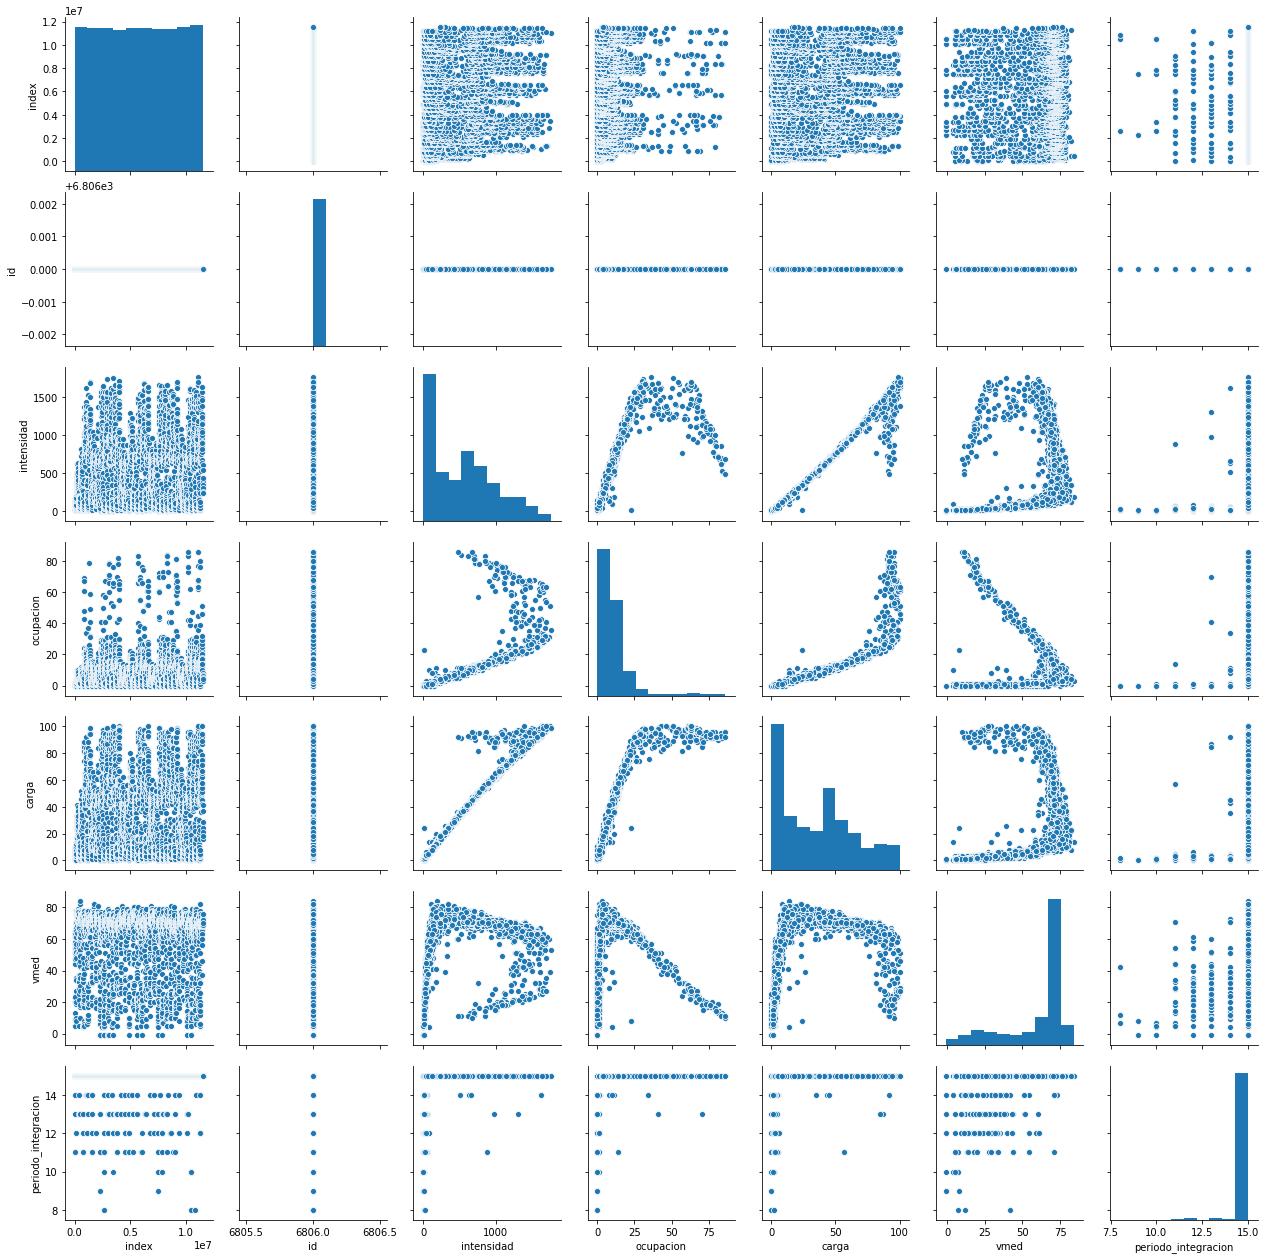

In [34]:
sns.pairplot(df_id6806)

#### Para comparar fechas hay que usar el método datetime
df_id6806['Fecha'][1] == datetime(2018, 5, 1).date()

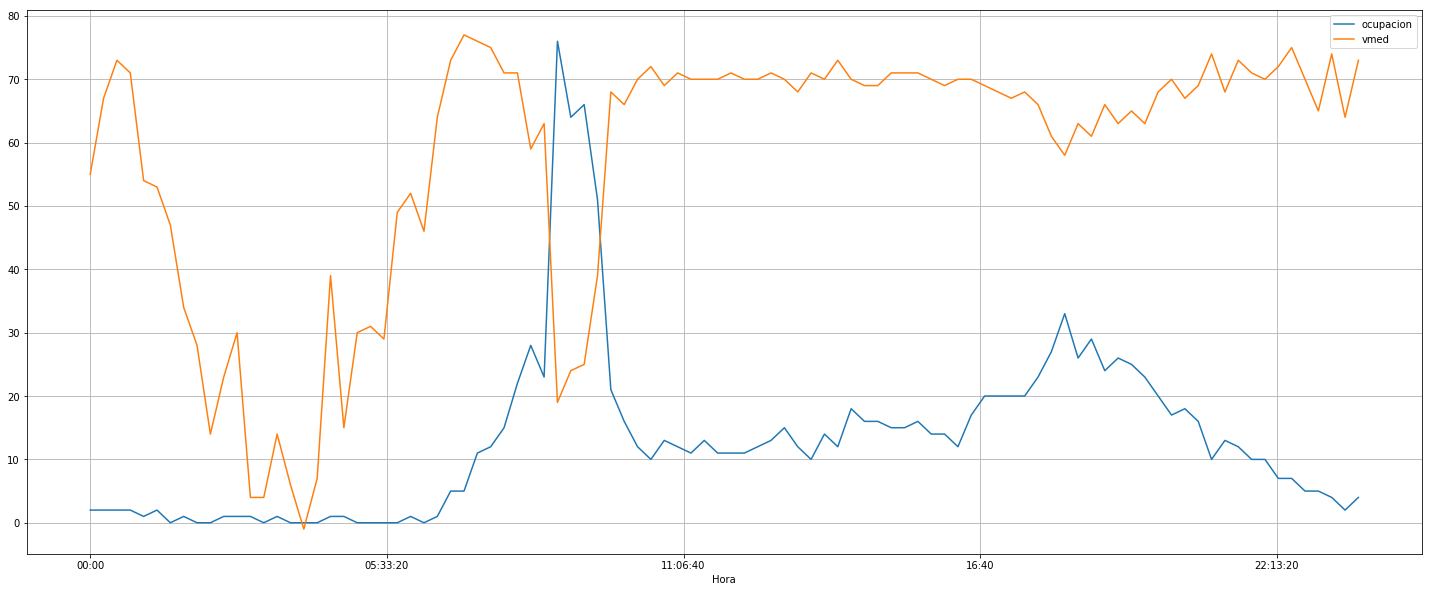

In [35]:
#ANALISIS POR HORAS EN UN DÍA PARA ESTE SENSOR
from datetime import datetime
df_id6806.loc[df_id6806['Fecha'] == datetime(2018, 5, 10).date()].plot(x='Hora',y=['ocupacion','vmed'],figsize=(25,10),grid=True)

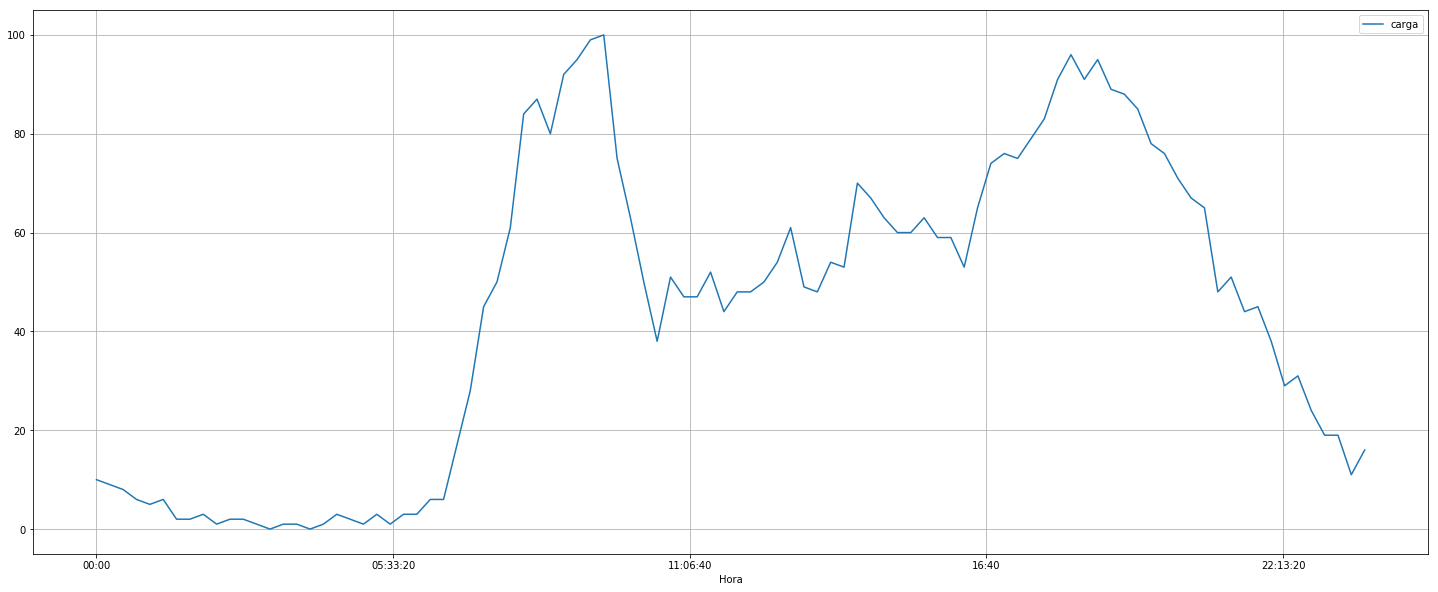

In [36]:
df_id6806.loc[df_id6806['Fecha'] == datetime(2018, 5, 10).date()].plot(x='Hora',y=['carga'],figsize=(25,10),grid=True)

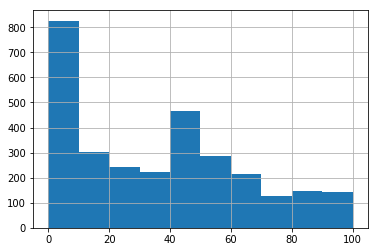

In [37]:
df_id6806['carga'].hist()

Tomar un día cualquiera, de un mes concreto a una hora especificada y ver la lectura de todos los sensores. 
Estudiar la carga, ocupación y la intensidad para cada tipo de sensor (M30 o URB).

Coger los datos de un sensor y estimar la ocupación en ese tramo con un modelo simple, dada una hora de entrada.

Probar con coger una serie temporal de un sensor y ver su evolución, buscando patrones que se repiran a lo largo de las semanas

Traffic flow has been considered as a stochastic process at least since Adams
(1936). He formulated the idea of arrivals as a random (i.e., Poisson) process
and verified good agreement with theory and observations.

see: http://lib.tkk.fi/Diss/199X/isbn951228474X/isbn951228474X.pdf

**Incorporación de las coordenadas X e Y (UMT) de cada punto de medida**

Lectura del fichero donde tenemos los datos de cada punto de medida

In [38]:
!pwd

/Users/antoniobravomunoz/Documents/GitHub/Data-Science-Master-project


In [39]:
sourceMP='/Users/antoniobravomunoz/Documents/DATA_SCIENCE_MASTER/TFM/Data/pmed_ubicacion_05-2018.csv'
dataMP=pd.read_csv(sourceMP,sep=';',encoding='ISO-8859-1',decimal=",")
#Problemas al usar el codec UTF-8, por eso se usa el ISO
dataMP.head()

,tipo_elem,cod_cent,id,nombre,x,y
0,M30,PM43011,6802,PM43011,440883.971763,4.482163e+06
1,M30,PM43012,6803,PM43012,440873.166836,4.482160e+06
2,M30,PM43021,6804,PM43021,440684.103811,4.482814e+06
3,M30,PM43022,3706,PM43022,440677.266644,4.482808e+06
4,M30,PM43031,6805,PM43031,440642.534868,4.483219e+06


In [40]:
dataMP.loc[dataMP['id'] == 1002]

,tipo_elem,cod_cent,id,nombre,x,y
150,M30,05FT37PM01,1002,05FT37PM01,436892.118106,4.473312e+06


In [41]:
dataMP.shape

(4099, 6)

In [42]:
full_df=data0518.join(dataMP.set_index('id')[['x','y']],on='id',how='left',rsuffix='_other')

In [43]:
full_df.head()

,id,tipo_elem,intensidad,ocupacion,carga,vmed,error,periodo_integracion,Fecha,Hora,Date,x,y
0,1001,M30,876,2,0,70,N,5,2018-05-01,00:00:00,2018-05-01,437146.022667,4.473498e+06
1,1002,M30,816,3,0,74,N,5,2018-05-01,00:00:00,2018-05-01,436892.118106,4.473312e+06
2,1003,M30,972,3,0,77,N,5,2018-05-01,00:00:00,2018-05-01,436630.102140,4.473180e+06
3,1006,M30,852,2,0,69,N,5,2018-05-01,00:00:00,2018-05-01,437526.638490,4.473735e+06
4,1009,M30,780,2,0,67,N,5,2018-05-01,00:00:00,2018-05-01,438499.044504,4.474209e+06


In [44]:
full_df.isna()

,id,tipo_elem,intensidad,ocupacion,carga,vmed,error,periodo_integracion,Fecha,Hora,Date,x,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False


In [45]:
full_df.loc[full_df['id'] == 1001]

,id,tipo_elem,intensidad,ocupacion,carga,vmed,error,periodo_integracion,Fecha,Hora,Date,x,y
0,1001,M30,876,2,0,70,N,5,2018-05-01,00:00:00,2018-05-01 00:00:00,437146.022667,4.473498e+06
3859,1001,M30,540,2,0,65,N,5,2018-05-01,00:15:00,2018-05-01 00:15:00,437146.022667,4.473498e+06
7717,1001,M30,528,2,0,74,N,5,2018-05-01,00:30:00,2018-05-01 00:30:00,437146.022667,4.473498e+06
11590,1001,M30,516,2,0,57,N,5,2018-05-01,00:45:00,2018-05-01 00:45:00,437146.022667,4.473498e+06
15469,1001,M30,420,1,0,57,N,5,2018-05-01,01:00:00,2018-05-01 01:00:00,437146.022667,4.473498e+06
19340,1001,M30,444,1,0,61,N,5,2018-05-01,01:15:00,2018-05-01 01:15:00,437146.022667,4.473498e+06
23210,1001,M30,528,1,0,73,N,5,2018-05-01,01:30:00,2018-05-01 01:30:00,437146.022667,4.473498e+06
27088,1001,M30,516,1,0,65,N,5,2018-05-01,01:45:00,2018-05-01 01:45:00,437146.022667,4.473498e+06
30960,1001,M30,540,2,0,56,N,5,2018-05-01,02:00:00,2018-05-01 02:00:00,437146.022667,4.473498e+06
34825,1001,M30,396,2,0,54,N,5,2018-05-01,02:15:00,2018-05-01 02:15:00,437146.022667,4.473498e+06


Transformación de las coordenadas de los puntos de medida a Latitud, Logitud

In [38]:
import math

def utmToLatLng(easting, northing, northernHemisphere=True,zone=30):
    #Defining default Madrid zone with the value: 30
    if not northernHemisphere:
        northing = 10000000 - northing

    a = 6378137
    e = 0.081819191
    e1sq = 0.006739497
    k0 = 0.9996

    arc = northing / k0
    mu = arc / (a * (1 - math.pow(e, 2) / 4.0 - 3 * math.pow(e, 4) / 64.0 - 5 * math.pow(e, 6) / 256.0))

    ei = (1 - math.pow((1 - e * e), (1 / 2.0))) / (1 + math.pow((1 - e * e), (1 / 2.0)))

    ca = 3 * ei / 2 - 27 * math.pow(ei, 3) / 32.0

    cb = 21 * math.pow(ei, 2) / 16 - 55 * math.pow(ei, 4) / 32
    cc = 151 * math.pow(ei, 3) / 96
    cd = 1097 * math.pow(ei, 4) / 512
    phi1 = mu + ca * math.sin(2 * mu) + cb * math.sin(4 * mu) + cc * math.sin(6 * mu) + cd * math.sin(8 * mu)

    n0 = a / math.pow((1 - math.pow((e * math.sin(phi1)), 2)), (1 / 2.0))

    r0 = a * (1 - e * e) / math.pow((1 - math.pow((e * math.sin(phi1)), 2)), (3 / 2.0))
    fact1 = n0 * math.tan(phi1) / r0

    _a1 = 500000 - easting
    dd0 = _a1 / (n0 * k0)
    fact2 = dd0 * dd0 / 2

    t0 = math.pow(math.tan(phi1), 2)
    Q0 = e1sq * math.pow(math.cos(phi1), 2)
    fact3 = (5 + 3 * t0 + 10 * Q0 - 4 * Q0 * Q0 - 9 * e1sq) * math.pow(dd0, 4) / 24

    fact4 = (61 + 90 * t0 + 298 * Q0 + 45 * t0 * t0 - 252 * e1sq - 3 * Q0 * Q0) * math.pow(dd0, 6) / 720

    lof1 = _a1 / (n0 * k0)
    lof2 = (1 + 2 * t0 + Q0) * math.pow(dd0, 3) / 6.0
    lof3 = (5 - 2 * Q0 + 28 * t0 - 3 * math.pow(Q0, 2) + 8 * e1sq + 24 * math.pow(t0, 2)) * math.pow(dd0, 5) / 120
    _a2 = (lof1 - lof2 + lof3) / math.cos(phi1)
    _a3 = _a2 * 180 / math.pi

    latitude = 180 * (phi1 - fact1 * (fact2 + fact3 + fact4)) / math.pi

    if not northernHemisphere:
        latitude = -latitude

    longitude = ((zone > 0) and (6 * zone - 183.0) or 3.0) - _a3

    return [latitude, longitude]

In [47]:
#Ejemplo:
utmToLatLng(437146.022667131,4473498.17235059)

[40.40972891570476, -3.7407857795876573]

Returning a list of float64

# Fuente:
https://stackoverflow.com/questions/343865/how-to-convert-from-utm-to-latlng-in-python-or-javascript

In [48]:
full_df.dtypes

id                              int64
tipo_elem                      object
intensidad                      int64
ocupacion                       int64
carga                           int64
vmed                            int64
error                          object
periodo_integracion             int64
Fecha                          object
Hora                           object
Date                   datetime64[ns]
x                             float64
y                             float64
dtype: object

In [49]:
full_df['LatLong'] = full_df.apply(lambda x: utmToLatLng(x['x'], x['y']), axis=1)

In [50]:
full_df.sample(10)

,id,tipo_elem,intensidad,ocupacion,carga,vmed,error,periodo_integracion,Fecha,Hora,Date,x,y,LatLong
7145165,3694,URB,66,82,44,0,N,14,2018-05-20,05:00:00,2018-05-20 05:00:00,439635.896963,4.476189e+06,"[40.43415070820052, -3.7116981502585276]"
8597857,6409,URB,5,0,0,0,N,15,2018-05-24,02:30:00,2018-05-24 02:30:00,448178.704301,4.474707e+06,"[40.42137904227014, -3.6108627908178574]"
7971430,6379,URB,584,11,50,0,N,15,2018-05-22,10:00:00,2018-05-22 10:00:00,444334.427159,4.476600e+06,"[40.438179731311884, -3.656341644348639]"
9463401,6892,M30,1344,3,0,69,N,5,2018-05-26,10:00:00,2018-05-26 10:00:00,442820.065834,4.471646e+06,"[40.3934509221603, -3.6737507309086848]"
5964047,5802,URB,81,3,15,0,N,15,2018-05-17,00:45:00,2018-05-17 00:45:00,443800.752065,4.471367e+06,"[40.39100753904658, -3.6621714625448605]"
5836580,3618,URB,71,4,20,0,N,15,2018-05-16,16:45:00,2018-05-16 16:45:00,439381.131045,4.473719e+06,"[40.41188794184369, -3.7144662482629176]"
7672162,6628,URB,27,2,9,0,N,6,2018-05-21,14:45:00,2018-05-21 14:45:00,444856.688947,4.482200e+06,"[40.488669035622564, -3.6506708159468726]"
5911577,4034,URB,681,4,47,0,N,15,2018-05-16,21:30:00,2018-05-16 21:30:00,443135.264316,4.475398e+06,"[40.427271222897105, -3.670372291579578]"
6580315,3855,URB,353,16,53,0,N,15,2018-05-18,16:45:00,2018-05-18 16:45:00,440810.764131,4.475178e+06,"[40.42512595467781, -3.6977531922654965]"
9245393,10098,URB,869,6,22,0,N,15,2018-05-25,20:00:00,2018-05-25 20:00:00,442386.739843,4.476259e+06,"[40.434976857828936, -3.679274031521662]"


In [51]:
full_df['LatLong'][0]

[40.40972891570476, -3.7407857795876565]

Splitting LatLong in two dataframe columns

In [52]:
full_df[['Lat','Long']] = pd.DataFrame(full_df.LatLong.values.tolist(), index= full_df.index)

In [53]:
full_df.sample(10)

,id,tipo_elem,intensidad,ocupacion,carga,vmed,error,periodo_integracion,Fecha,Hora,Date,x,y,LatLong,Lat,Long
11166992,5430,URB,84,1,4,0,N,15,2018-05-31,01:00:00,2018-05-31 01:00:00,440279.706135,4.481295e+06,"[40.480199247628306, -3.704588542410929]",40.480199,-3.704589
1055145,6694,M30,1352,2,26,90,N,15,2018-05-03,20:30:00,2018-05-03 20:30:00,436917.366329,4.478681e+06,"[40.4564044832781, -3.743994927034901]",40.456404,-3.743995
7828295,5932,URB,22,0,6,0,N,15,2018-05-22,00:45:00,2018-05-22 00:45:00,444393.463033,4.476007e+06,"[40.43284889161944, -3.655593789203931]",40.432849,-3.655594
3076158,6591,URB,15,0,1,0,N,15,2018-05-09,06:45:00,2018-05-09 06:45:00,443194.648264,4.483589e+06,"[40.50106737788327, -3.6704055381988234]",40.501067,-3.670406
8346933,7067,URB,1007,8,45,0,N,15,2018-05-23,10:00:00,2018-05-23 10:00:00,440050.593694,4.475693e+06,"[40.42971969446294, -3.7067624859194663]",40.429720,-3.706762
1270190,3485,URB,355,3,11,0,N,14,2018-05-04,10:30:00,2018-05-04 10:30:00,440528.619465,4.481266e+06,"[40.47994950809812, -3.7016492506215313]",40.479950,-3.701649
10267477,6276,URB,47,18,27,0,N,15,2018-05-28,14:30:00,2018-05-28 14:30:00,445180.900427,4.478499e+06,"[40.45535045789263, -3.6465256305349336]",40.455350,-3.646526
1822280,3626,URB,398,4,29,0,N,15,2018-05-05,22:30:00,2018-05-05 22:30:00,433947.662373,4.478974e+06,"[40.45880790016807, -3.779046962102838]",40.458808,-3.779047
7240886,3574,URB,67,17,21,0,N,15,2018-05-20,11:15:00,2018-05-20 11:15:00,438374.488298,4.470804e+06,"[40.38555182301991, -3.726047663896792]",40.385552,-3.726048
5048298,10318,URB,52,0,3,0,N,15,2018-05-14,13:45:00,2018-05-14 13:45:00,438441.783146,4.482809e+06,"[40.49370168017941, -3.7264180055313165]",40.493702,-3.726418


In [54]:
full_df.dtypes

id                              int64
tipo_elem                      object
intensidad                      int64
ocupacion                       int64
carga                           int64
vmed                            int64
error                          object
periodo_integracion             int64
Fecha                          object
Hora                           object
Date                   datetime64[ns]
x                             float64
y                             float64
LatLong                        object
Lat                           float64
Long                          float64
dtype: object

In [55]:
len(full_df['Lat'].unique())

4021

In [56]:
len(full_df['Long'].unique())

4021

Describing Lat and long in tuple structures

In [57]:
objective_set=list(zip(full_df['Lat'].unique(),full_df['Long'].unique()))

In [58]:
len(objective_set)

4021

In [59]:
objective_set

[(40.40972891570476, -3.7407857795876565),
 (40.408029399211415, -3.743759516520268),
 (40.40682401717148, -3.7468341599025066),
 (40.41189365193301, -3.736323543438256),
 (40.41623341130723, -3.724909242715963),
 (40.41631207040859, -3.7250433138356334),
 (40.41823366526102, -3.723075691882708),
 (40.41986118804395, -3.722096803417042),
 (40.419970304843005, -3.7225321307068984),
 (40.419889212058614, -3.7226771711904982),
 (40.420487420549705, -3.721842824441285),
 (40.42044273070589, -3.7219285018733683),
 (40.422267355088835, -3.7254908390954053),
 (40.42181557189828, -3.724761304950471),
 (40.38734485633783, -3.696708933062639),
 (40.38948159349482, -3.6980781040696296),
 (40.39348362592617, -3.7027269565514667),
 (40.393636396614035, -3.7032467677381797),
 (40.39438837810203, -3.7058759258966703),
 (40.39416795854281, -3.7045455704891985),
 (40.39503511483435, -3.7023340096135637),
 (40.39499039108415, -3.7024492570359957),
 (40.39502662598253, -3.7033680354502705),
 (40.39652097

In [60]:
type(objective_set[0])

tuple

**[CHECKPOINT] Saving the full_df in order to not have to run all the notebook**

In [63]:
full_df.shape

(11501592, 16)

In [64]:
full_df.columns

Index(['id', 'tipo_elem', 'intensidad', 'ocupacion', 'carga', 'vmed', 'error',
       'periodo_integracion', 'Fecha', 'Hora', 'Date', 'x', 'y', 'LatLong',
       'Lat', 'Long'],
      dtype='object')

Deleting columns with duplicating information

In [65]:
df_0518_test=full_df.drop(columns=['LatLong'])
df_0518_test.shape

(11501592, 15)

**Missing Values**

In [21]:
df_0518_test.isnull().any()

id                     False
tipo_elem              False
intensidad             False
ocupacion              False
carga                  False
vmed                   False
error                  False
periodo_integracion    False
Fecha                  False
Hora                   False
Date                   False
x                       True
y                       True
Lat                     True
Long                    True
dtype: bool

In [25]:
nan_rows = df_0518_test[df_0518_test['Lat'].isnull()]
nan_rows.shape

(2582, 15)

In [29]:
nan_rows.groupby(['id']).count()

,tipo_elem,intensidad,ocupacion,carga,vmed,error,periodo_integracion,Fecha,Hora,Date,x,y,Lat,Long
id,,,,,,,,,,,,,,
4735,5,5,5,5,5,5,5,5,5,5,0,0,0,0
4736,912,912,912,912,912,912,912,912,912,912,0,0,0,0
6251,1665,1665,1665,1665,1665,1665,1665,1665,1665,1665,0,0,0,0


There are Nan values from some features (x, y, Lat and Long)

In [35]:
df_0518_test.loc[df_0518_test['id']==4735].shape

(5, 15)

In [36]:
df_0518_test.loc[df_0518_test['id']==4736].shape

(912, 15)

In [37]:
df_0518_test.loc[df_0518_test['id']==6251].shape

(1665, 15)

We can not identify the location of these 3 sensors because all of its measures are with null coordenates.

These 3 sensors has been checked in Measurement points dataset where information of the different MP are collected and classified. For these cases, no information about them has been found.

At this point, we have 2 options:
    1. Role out all of these registers
    2. Take the loan values into account in order to improve the regression model. 

Currently, at this time on the prject development, we are going to reject them. In a near future we come back at this point....

**Removing the Nan values and save the dataframe as csv file**

In [53]:
df_0518_test=df_0518_test.dropna(axis=0)

In [67]:
df_0518_test.shape

(11499010, 15)

In [63]:
df_0518_test.to_csv('/Users/antoniobravomunoz/Documents/DATA_SCIENCE_MASTER/TFM/Data-Science-Master-project/DATA/df_0518_testing_noNan.csv',index=False)

df_0518_test=pd.read_csv('/Users/antoniobravomunoz/Documents/DATA_SCIENCE_MASTER/TFM/Data-Science-Master-project/DATA/df_0518_testing_noNan.zip')

Function to map in a uniform way the feature tipo_eleme

In [21]:
def tp_uniform(tp):
    if tp=='PUNTOS MEDIDA M-30':
        return 'M30'
    else:
        return 'URB'

**TAKING OTHER DIFFERENT MONTH. FOR EXAMPLE JANUARY 2018**

In [29]:
source='/Users/antoniobravomunoz/Documents/DATA_SCIENCE_MASTER/TFM/Data/Historico/01-2018.zip'
data0118=pd.read_csv(source,sep=';')
data0118.sample(10)

,id,fecha,tipo_elem,intensidad,ocupacion,carga,vmed,error,periodo_integracion
3970096,3654,2018-01-11 16:15:00,PUNTOS MEDIDA URBANOS,1220,4,28,0,N,15
8597993,9842,2018-01-24 01:15:00,PUNTOS MEDIDA URBANOS,5,0,0,0,N,15
1693832,6368,2018-01-05 13:15:00,PUNTOS MEDIDA URBANOS,136,3,17,0,N,15
7146800,6987,2018-01-20 04:00:00,PUNTOS MEDIDA URBANOS,34,0,1,0,N,15
10984262,4317,2018-01-30 11:30:00,PUNTOS MEDIDA URBANOS,1711,7,47,0,N,15
10665302,10222,2018-01-29 14:45:00,PUNTOS MEDIDA URBANOS,805,28,64,0,N,15
9638778,6557,2018-01-26 20:15:00,PUNTOS MEDIDA URBANOS,195,3,40,0,N,15
1073194,3997,2018-01-03 21:30:00,PUNTOS MEDIDA URBANOS,335,3,24,0,N,15
6632519,5749,2018-01-18 19:15:00,PUNTOS MEDIDA URBANOS,369,7,14,0,N,15
4950374,5588,2018-01-14 07:15:00,PUNTOS MEDIDA URBANOS,53,0,1,0,N,3


In [30]:
# nº de medidas categorizadas como erróneas
print(data0118.shape[0]-pd.value_counts(data0118['error']))

N    0
Name: error, dtype: int64


From 01-2017 up to 09-2017 there is an additional column 'identif'. In order to train and predict, this feature do not provide with any improvement to the final result. This only will be used for estimating the route from A to B 

In [32]:
data0118['fecha']=pd.to_datetime(data0118['fecha'], format='%Y-%m-%d %H:%M:%S')

In [33]:
data0118['Fecha']=data0118["fecha"].dt.date
data0118['Hora']=data0118["fecha"].dt.time
data0118["Date"]=data0118["fecha"]
data0118 = data0118.drop('fecha', 1)
data0118.dtypes

id                              int64
tipo_elem                      object
intensidad                      int64
ocupacion                       int64
carga                           int64
vmed                            int64
error                          object
periodo_integracion             int64
Fecha                          object
Hora                           object
Date                   datetime64[ns]
dtype: object

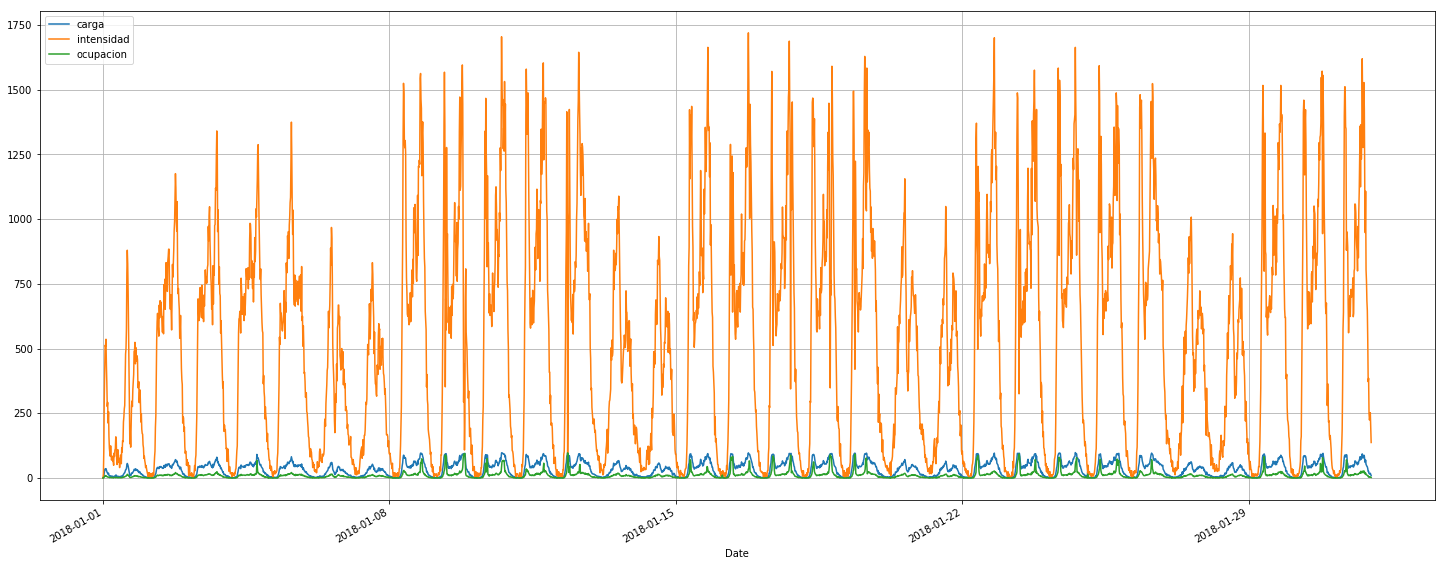

In [36]:
data0118.loc[data0118['id'] == 6806].plot(x='Date',y=['carga','intensidad','ocupacion'],figsize=(25,10),grid=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1f52c0b00>,
      dtype=object)

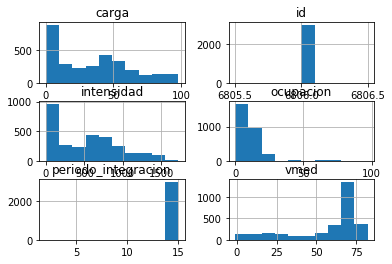

In [37]:
data0118.loc[data0118['id'] == 6806].hist()

In [39]:
sourceMP='/Users/antoniobravomunoz/Documents/DATA_SCIENCE_MASTER/TFM/Data/pmed_ubicacion_05-2018.csv'
dataMP=pd.read_csv(sourceMP,sep=';',encoding='ISO-8859-1',decimal=",")
full_df2=data0118.join(dataMP.set_index('id')[['x','y']],on='id',how='left',rsuffix='_other')

In [40]:
full_df2.sample(5)

,id,tipo_elem,intensidad,ocupacion,carga,vmed,error,periodo_integracion,Fecha,Hora,Date,x,y
5904628,5769,PUNTOS MEDIDA URBANOS,743,8,19,0,N,15,2018-01-16,20:30:00,2018-01-16 20:30:00,438257.783670,4.476784e+06
7510638,6508,PUNTOS MEDIDA URBANOS,55,1,4,0,N,15,2018-01-21,03:30:00,2018-01-21 03:30:00,447762.083719,4.477252e+06
377542,6274,PUNTOS MEDIDA URBANOS,28,0,1,0,N,15,2018-01-02,00:30:00,2018-01-02 00:30:00,446751.608373,4.479365e+06
8471113,5382,PUNTOS MEDIDA URBANOS,399,11,49,0,N,13,2018-01-23,17:15:00,2018-01-23 17:15:00,448907.745372,4.468724e+06
7050393,4557,PUNTOS MEDIDA URBANOS,248,7,23,0,N,15,2018-01-19,22:00:00,2018-01-19 22:00:00,439701.582651,4.480803e+06


In [42]:
full_df2['LatLong'] = full_df2.apply(lambda x: utmToLatLng(x['x'], x['y']), axis=1)
full_df2[['Lat','Long']] = pd.DataFrame(full_df2.LatLong.values.tolist(), index= full_df2.index)
df_0118_test=full_df2.drop(columns=['LatLong'])

In [43]:
df_0118_test.isnull().any()

id                     False
tipo_elem              False
intensidad             False
ocupacion              False
carga                  False
vmed                   False
error                  False
periodo_integracion    False
Fecha                  False
Hora                   False
Date                   False
x                       True
y                       True
Lat                     True
Long                    True
dtype: bool

In [44]:
df_0118_test=df_0118_test.dropna(axis=0)

In [45]:
df_0118_test.shape

(11529026, 15)

In [46]:
df_0118_test['LatLong'] = df_0118_test.apply(lambda x: tp_uniform, axis=1)

In [47]:
df_0118_test.head()

,id,tipo_elem,intensidad,ocupacion,carga,vmed,error,periodo_integracion,Fecha,Hora,Date,x,y,Lat,Long,LatLong
0,1001,PUNTOS MEDIDA M-30,204,12,0,73,N,5,2018-01-01,00:00:00,2018-01-01,437146.022667,4.473498e+06,40.409729,-3.740786,<function tp_uniform at 0x107606510>
1,1002,PUNTOS MEDIDA M-30,252,1,0,79,N,5,2018-01-01,00:00:00,2018-01-01,436892.118106,4.473312e+06,40.408029,-3.743760,<function tp_uniform at 0x107606510>
2,1003,PUNTOS MEDIDA M-30,420,2,0,82,N,5,2018-01-01,00:00:00,2018-01-01,436630.102140,4.473180e+06,40.406824,-3.746834,<function tp_uniform at 0x107606510>
3,1006,PUNTOS MEDIDA M-30,288,1,0,75,N,5,2018-01-01,00:00:00,2018-01-01,437526.638490,4.473735e+06,40.411894,-3.736324,<function tp_uniform at 0x107606510>
4,1009,PUNTOS MEDIDA M-30,276,0,0,76,N,5,2018-01-01,00:00:00,2018-01-01,438499.044504,4.474209e+06,40.416233,-3.724909,<function tp_uniform at 0x107606510>
